# Загрузка данных и импорт библиотек

!kaggle competitions download -c advanced-dls-spring-2021

!unzip advanced-dls-spring-2021.zip -d data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')
%matplotlib inline

pd.options.mode.chained_assignment = None

# EDA

In [2]:
train_df = pd.read_csv('data/train.csv')
df = train_df.copy()
df.head()

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,72,25.85,1872.2,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2,1,75.90,75.9,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1
3,32,79.30,2570,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,0
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   object 
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

In [4]:
df.isna().any()

ClientPeriod                False
MonthlySpending             False
TotalSpent                  False
Sex                         False
IsSeniorCitizen             False
HasPartner                  False
HasChild                    False
HasPhoneService             False
HasMultiplePhoneNumbers     False
HasInternetService          False
HasOnlineSecurityService    False
HasOnlineBackup             False
HasDeviceProtection         False
HasTechSupportAccess        False
HasOnlineTV                 False
HasMovieSubscription        False
HasContractPhone            False
IsBillingPaperless          False
PaymentMethod               False
Churn                       False
dtype: bool

In [5]:
df.shape

(5282, 20)

In [6]:
df.Churn.value_counts(normalize=True)

0    0.737978
1    0.262022
Name: Churn, dtype: float64

Начнем анализ с числовых переменных. В TotalSpent значения записаны как строки, а вместо nan используется пробел. Приведем этот признак к float.

In [7]:
num_cols = ['ClientPeriod', 'MonthlySpending', 'TotalSpent']

In [8]:
def handle_num_data(data=df, log=False):
    
    data['TotalSpent'] = data['TotalSpent'].replace(' ', np.nan).fillna(0)
    for col in num_cols:
        data[col] = data[col].astype('float')
        
        if log:
            data[col] = np.log(data[col])
        
    return data

In [9]:
df = handle_num_data()

In [10]:
class Plotter:
    '''класс для отрисовки графиков'''
    
    def __init__(self, data=df): 
        self.data = data
            
    
    def dist_plot(self, col, log_scale=False, bins='auto', binwidth=None, hue=None):
        
        plt.figure(figsize=(15, 6))
        
        data = self.data
            
        sns.histplot(
            data=data,
            x=col,
            bins=bins,
            binwidth=binwidth,
            log_scale=log_scale,
            hue=hue
        )
        
        plt.title(f'Distribution of values in {col}')
        plt.show()
        
    
    def kde_plot(self, col, log_scale=False, cut_tails=False):
        
        plt.figure(figsize=(15, 6))

        data = self.data

        sns.kdeplot(
            data.loc[data.Churn==0, col],
            label='target==0',
            log_scale=log_scale
        )
        
        sns.kdeplot(
            data.loc[data.Churn==1, col],
            label='target==1',
            log_scale=log_scale
        )
        
        plt.title(f'Distribution of values in {col} by target')
        plt.legend()
        plt.show()
            
    
    def cat_plot(self, col, hide_yticks=False):
        
        if len(df[col].unique()) == 2:
            self.binary_plot(col)
            return

        order = self.data[col].value_counts().index.tolist()
        n_features = len(order)
        y_size = n_features*2
            
        fig, ax = plt.subplots(1, 2, figsize=(20, y_size))
        sns.countplot(data=self.data, y=col, ax=ax[0], order=order)
        ax[0].set_xlabel('Count of values')
        ax[0].set_ylabel('')
        
        sns.barplot(data=self.data, y=col, x='Churn', ax=ax[1], order=order)
        if hide_yticks:
            ax[1].set_yticklabels([])
        ax[1].set_xlabel('Churn rate')
        ax[1].set_ylabel('')
        
        fig.suptitle(f'Distribution of values and churn rate by each category in {col}')
        plt.show()
    
    
    def binary_plot(self, col):
        
        fig, ax = plt.subplots(1, 2, figsize=(15, 6))
        sns.countplot(data=self.data, x=col, ax=ax[0])
        ax[0].set_ylabel('Count of values')
        ax[0].set_xlabel('')
        
        sns.barplot(data=self.data, x=col, y='Churn', ax=ax[1])
        ax[1].set_ylabel('Churn rate')
        ax[1].set_xlabel('')
        
        fig.suptitle(f'Distribution of values and churn rate by each category in {col}')
        plt.show()

In [11]:
pl = Plotter()

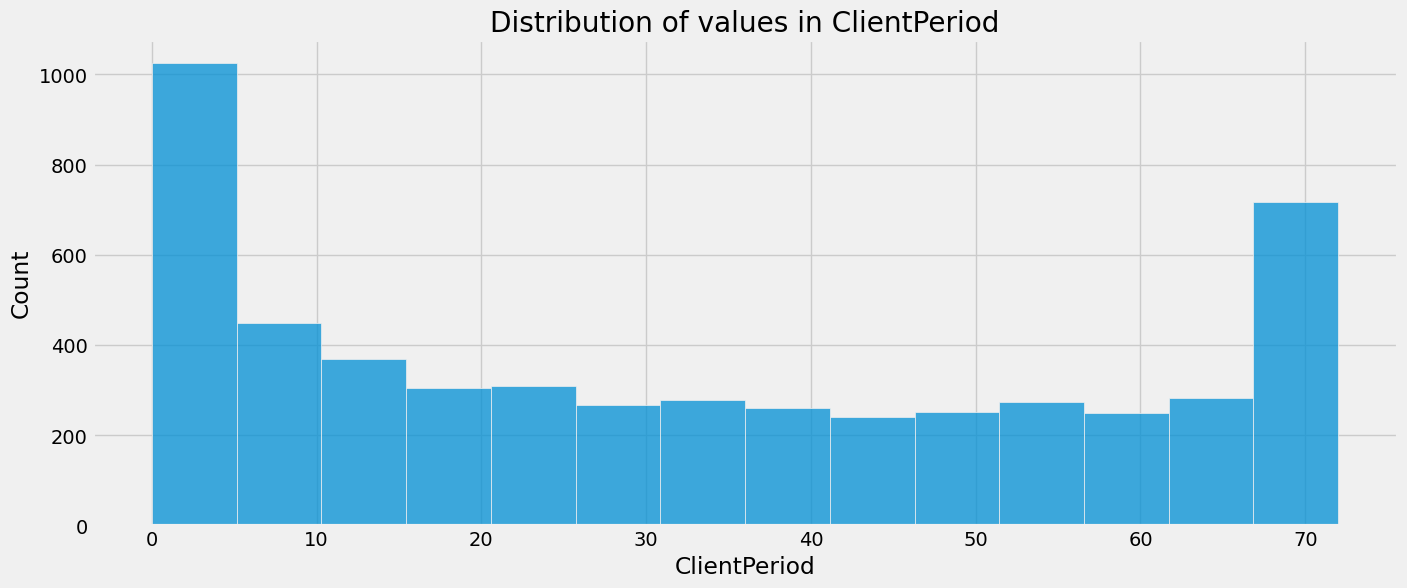

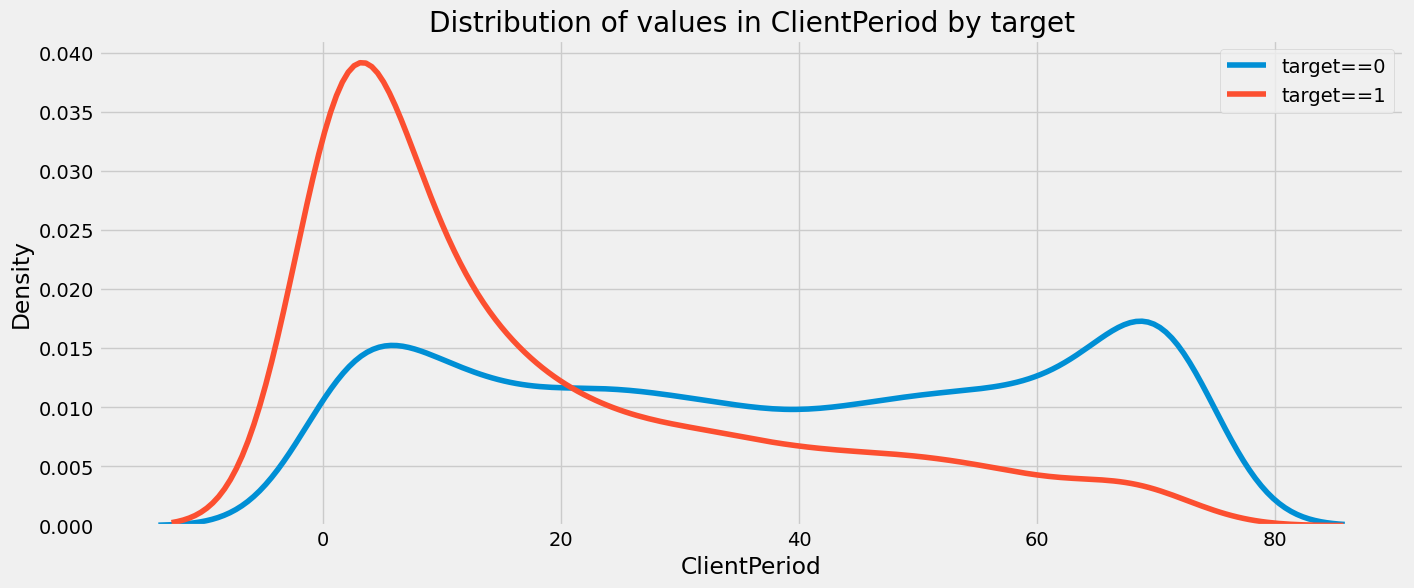

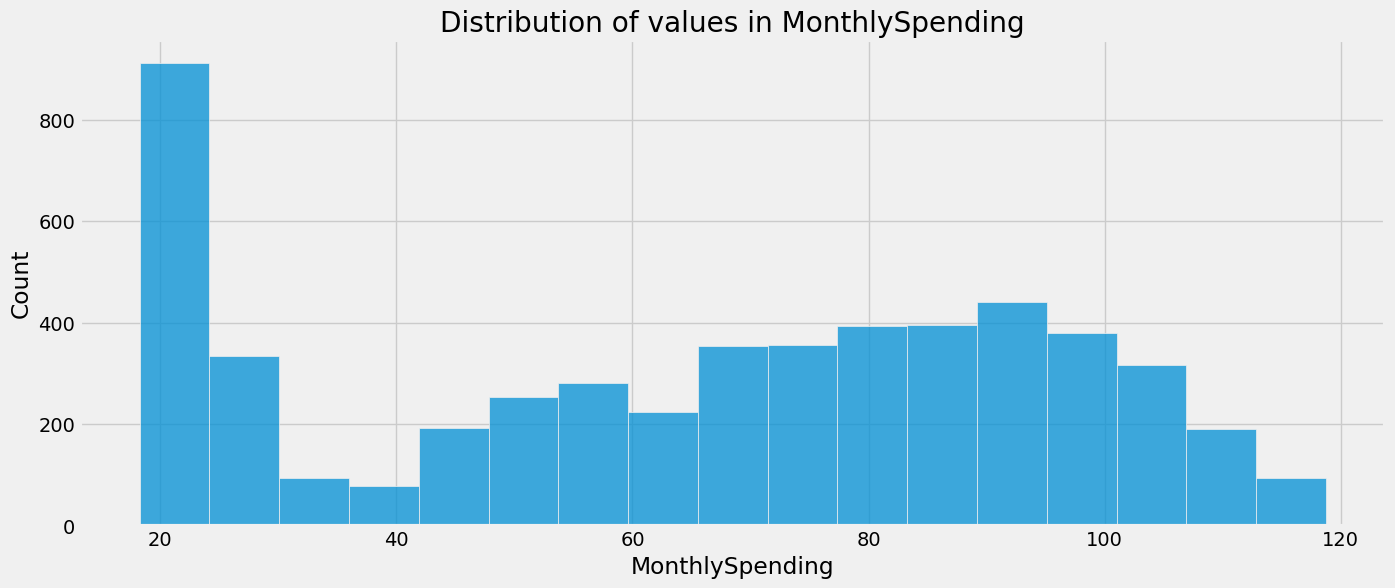

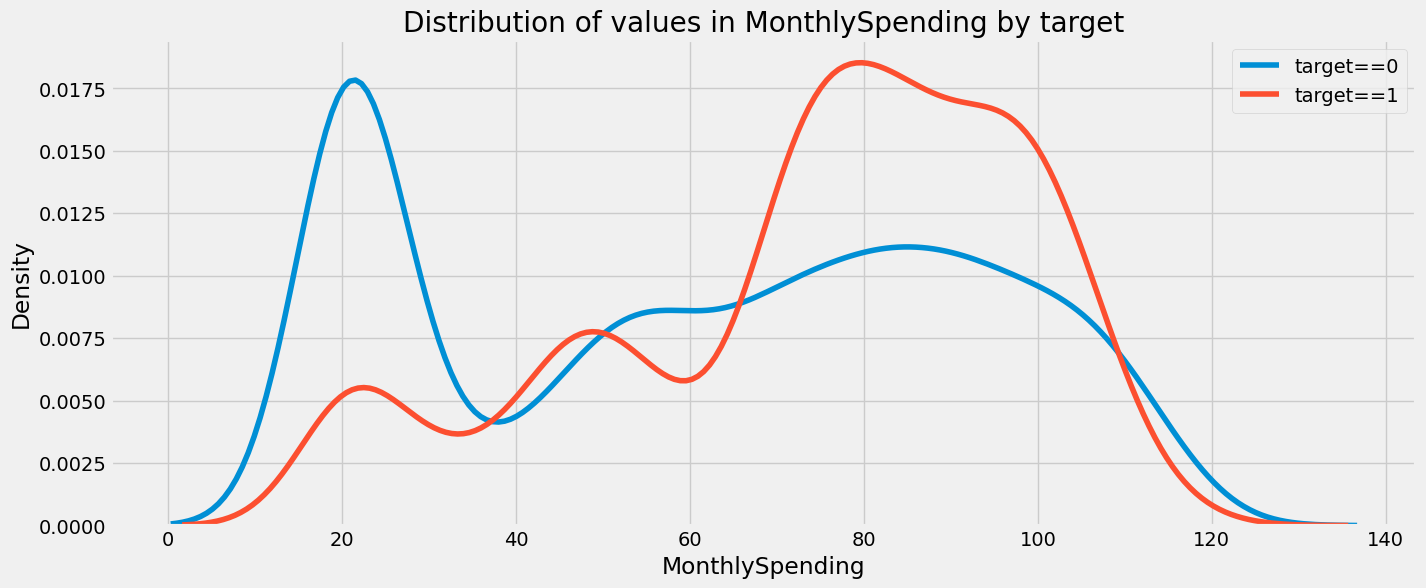

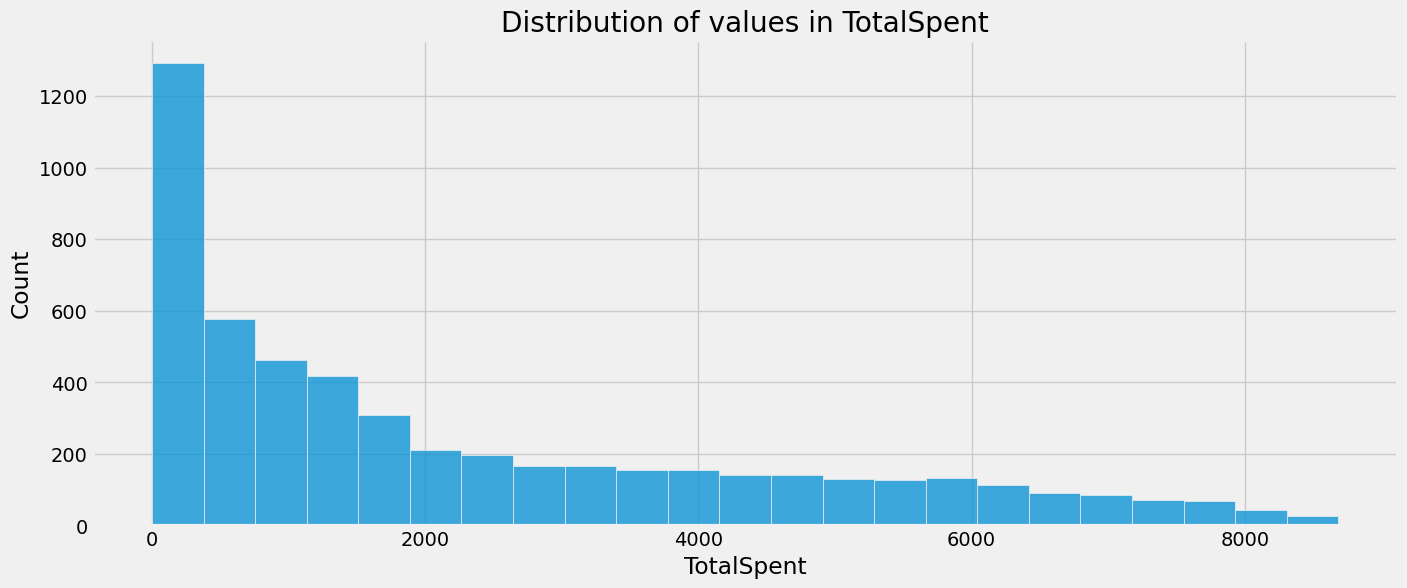

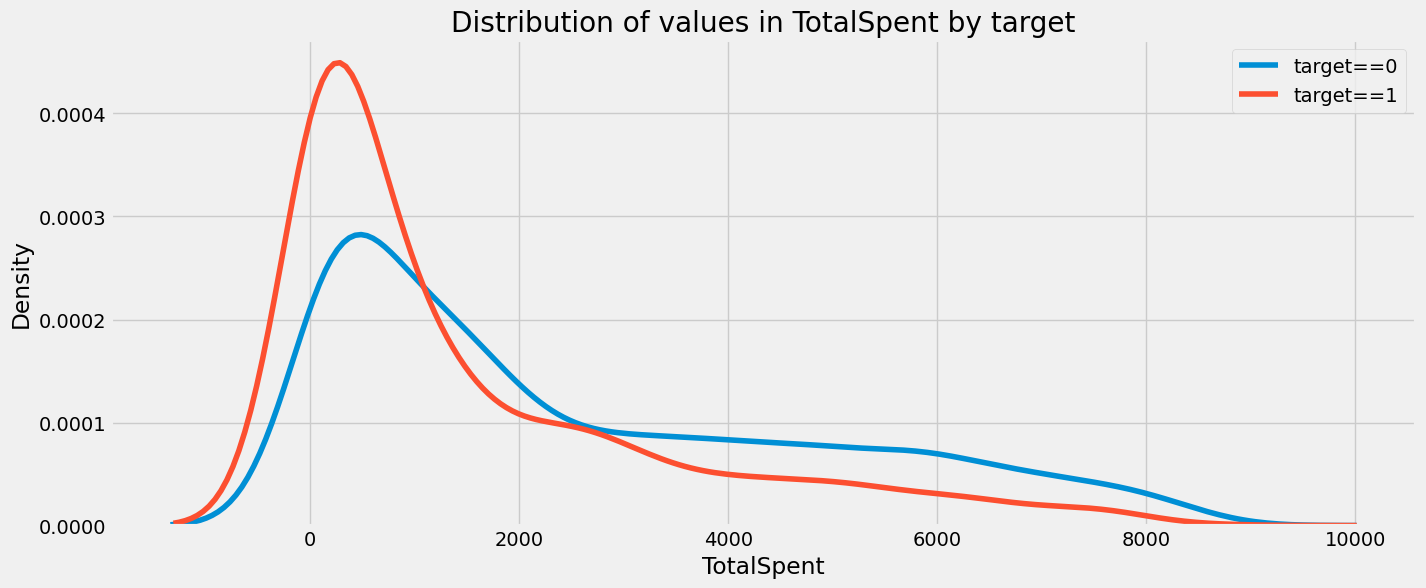

In [12]:
for col in num_cols:
    pl.dist_plot(col)
    pl.kde_plot(col)

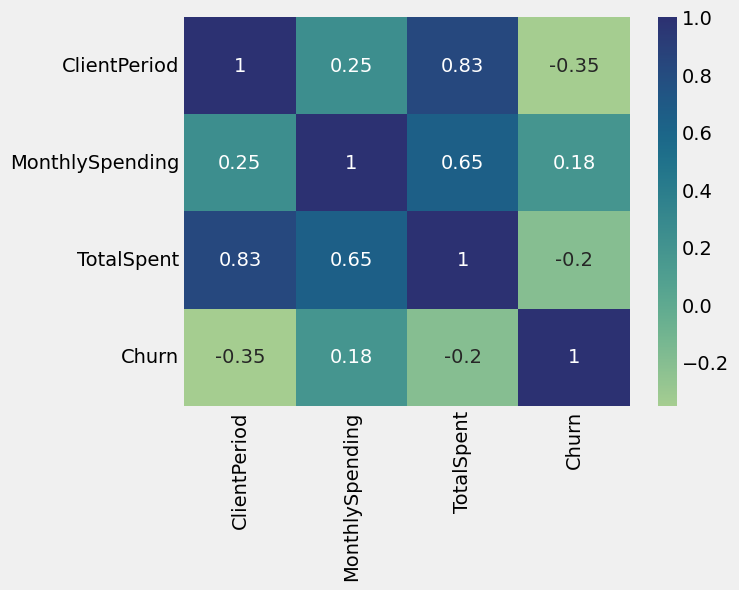

In [13]:
corr = df[num_cols + ['Churn']].corr()
sns.heatmap(corr, cmap='crest', annot=True)
plt.show()

Наблюдения:
* Выбросов в данных не обнаружено;
* Чем дольше человек является клиентом компании, тем меньше вероятность оттока;
* Доля ушедших клиентов увеличивается с ростом ежемесячной абонентской платы;
* Чем больше показатель суммарных выплат (TotalSpent), тем меньше доля оттока.

Очевидно, что чем дольше клиент пользуется услугами компании, тем больше значение суммарных выплат. Потому, признаки TotalSpent и ClientPeriod сильно коррелируют друг с другом.  
Также, признак TotalSpent коррелирует с MonthlySpending, что тоже не удивительно, т.к. чем больше плата в месяц, тем больше будет суммарное количество выплат. 
Наиболее сильная корреляция с целевой переменной(Churn) наблюдается по признаку ClientPeriod. 

Далее проанализируем категориальные признаки. Слева отрисуем распределение категорий в данных, а справа - долю ушедших клиентов в каждой из категорий.

In [14]:
binary_cols = df.loc[:, (df.nunique() == 2)].columns.to_list()
binary_cols

['Sex',
 'IsSeniorCitizen',
 'HasPartner',
 'HasChild',
 'HasPhoneService',
 'IsBillingPaperless',
 'Churn']

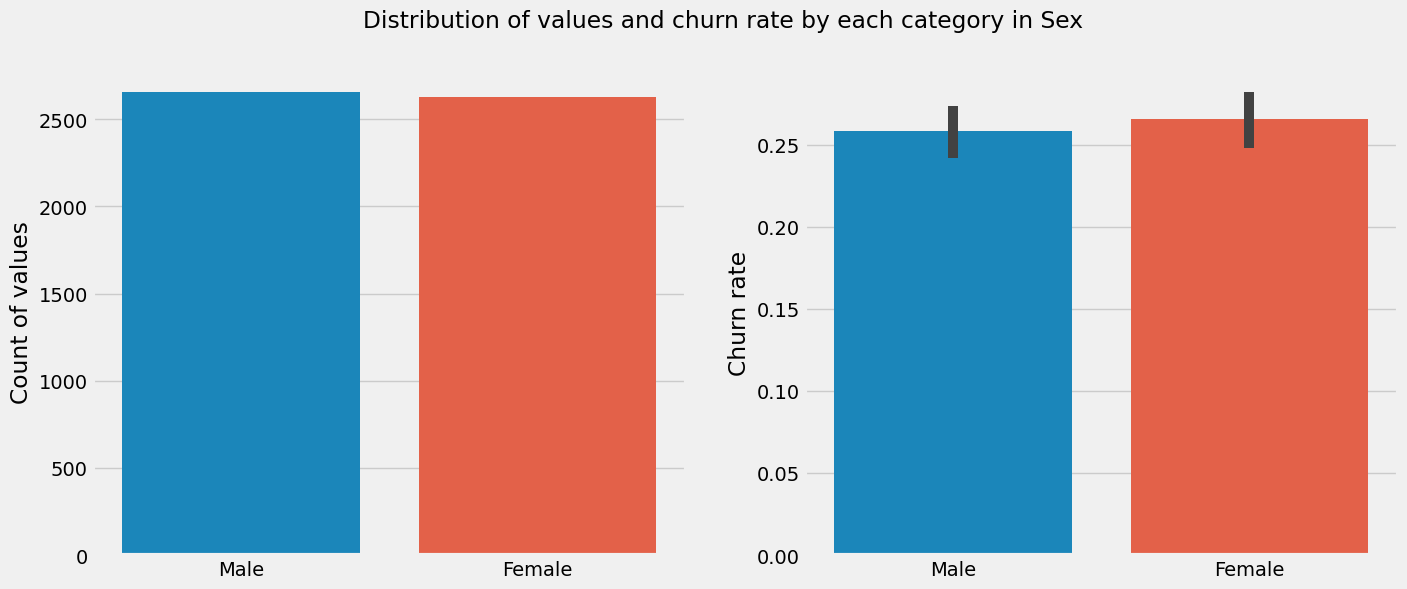

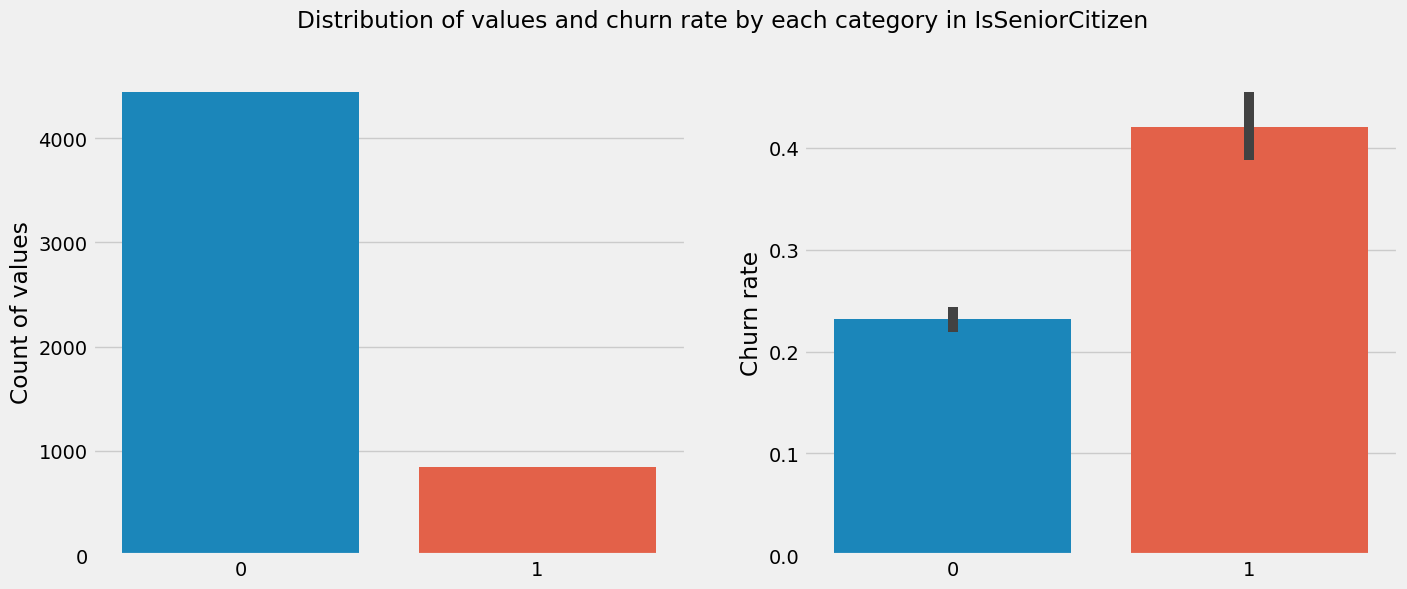

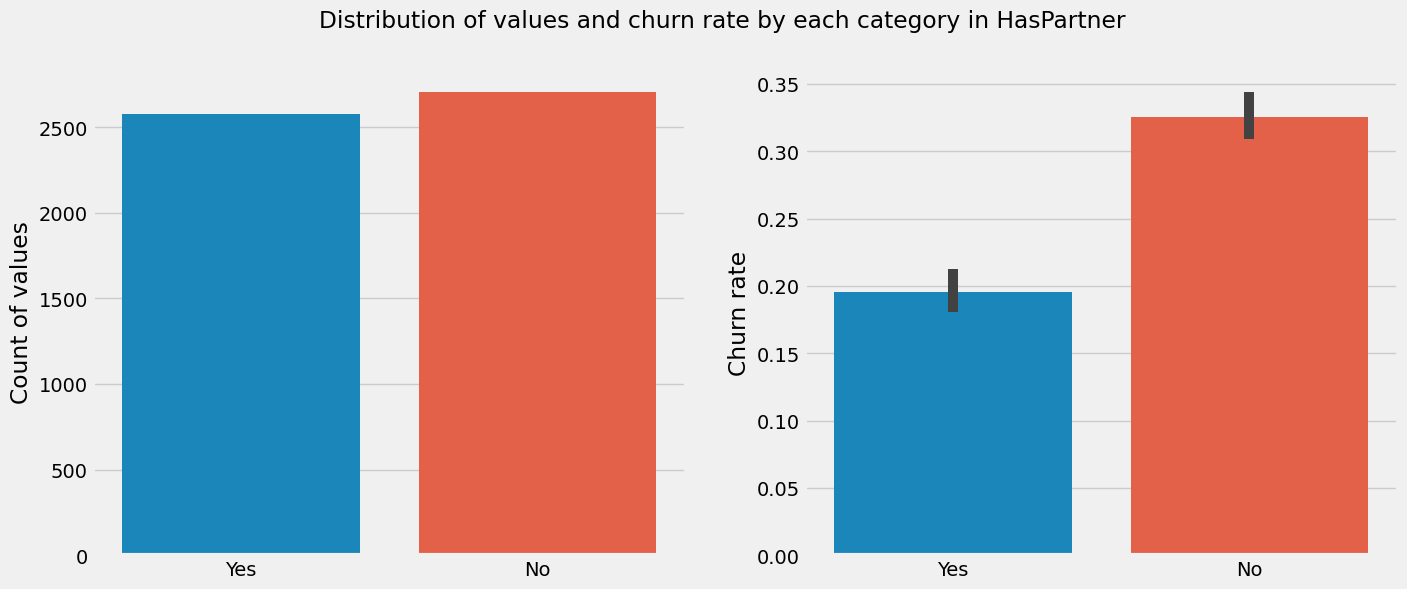

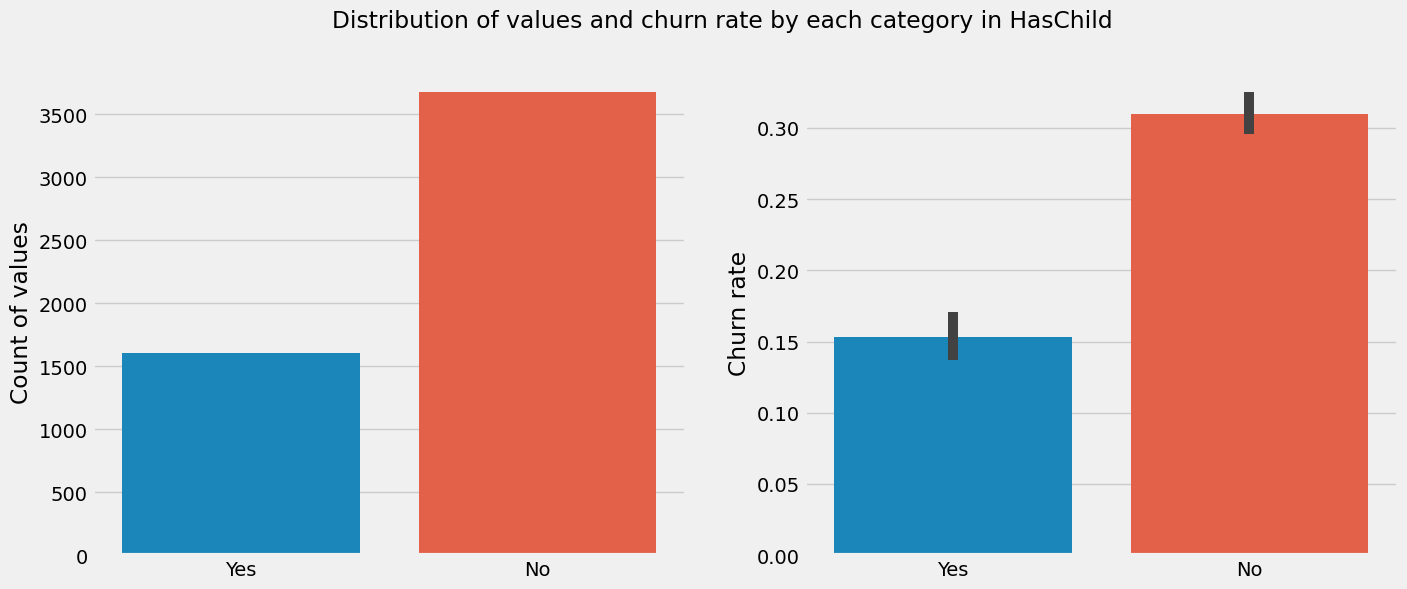

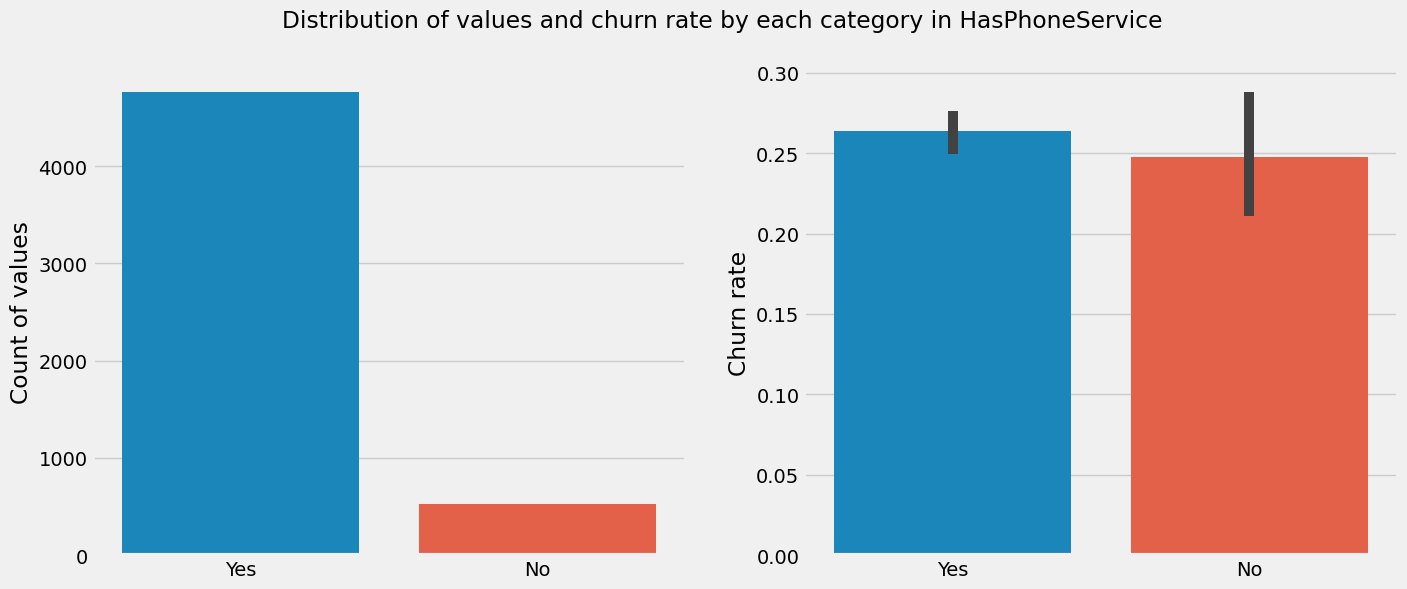

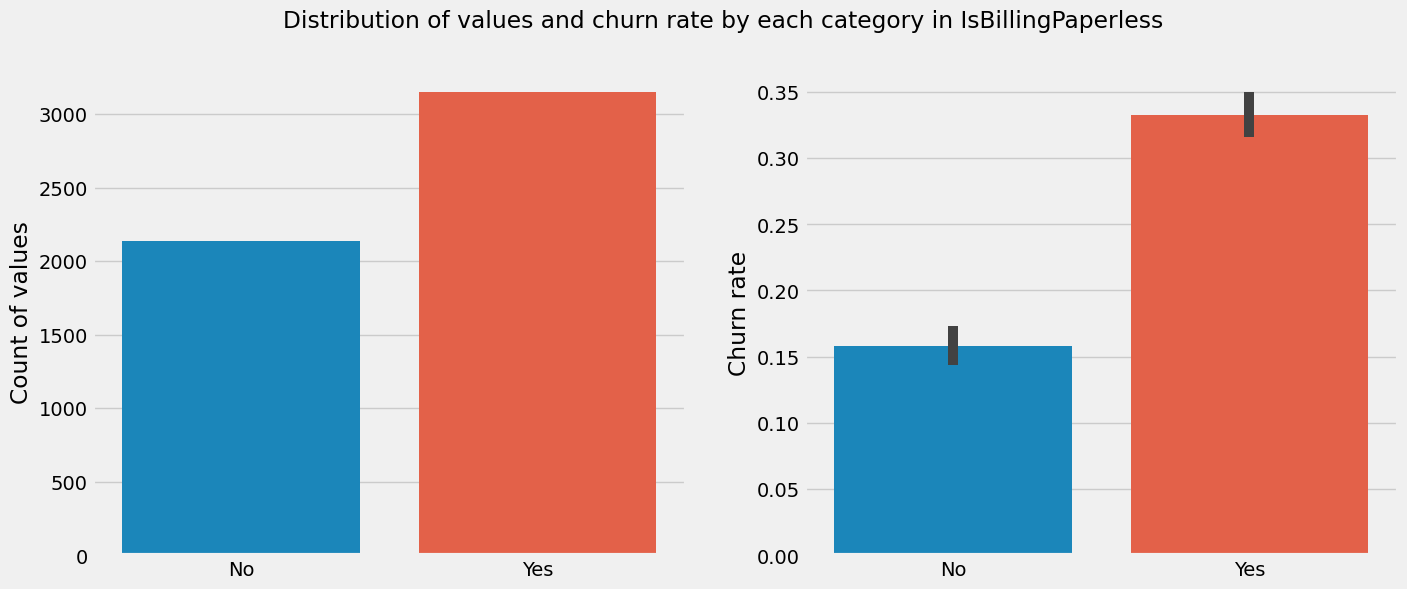

In [15]:
for col in binary_cols[:-1]:
    pl.binary_plot(col)

In [16]:
def handle_binary_data(data=df):
    # Конвертируем типы данных object в int

    pattern = {
        'No': 0,
        'Yes': 1,
        'Male': 0,
        'Female': 1
    }

    for col in binary_cols[:-1]:
        data[col] = data[col].replace(pattern)
        
    return data

In [17]:
df = handle_binary_data()

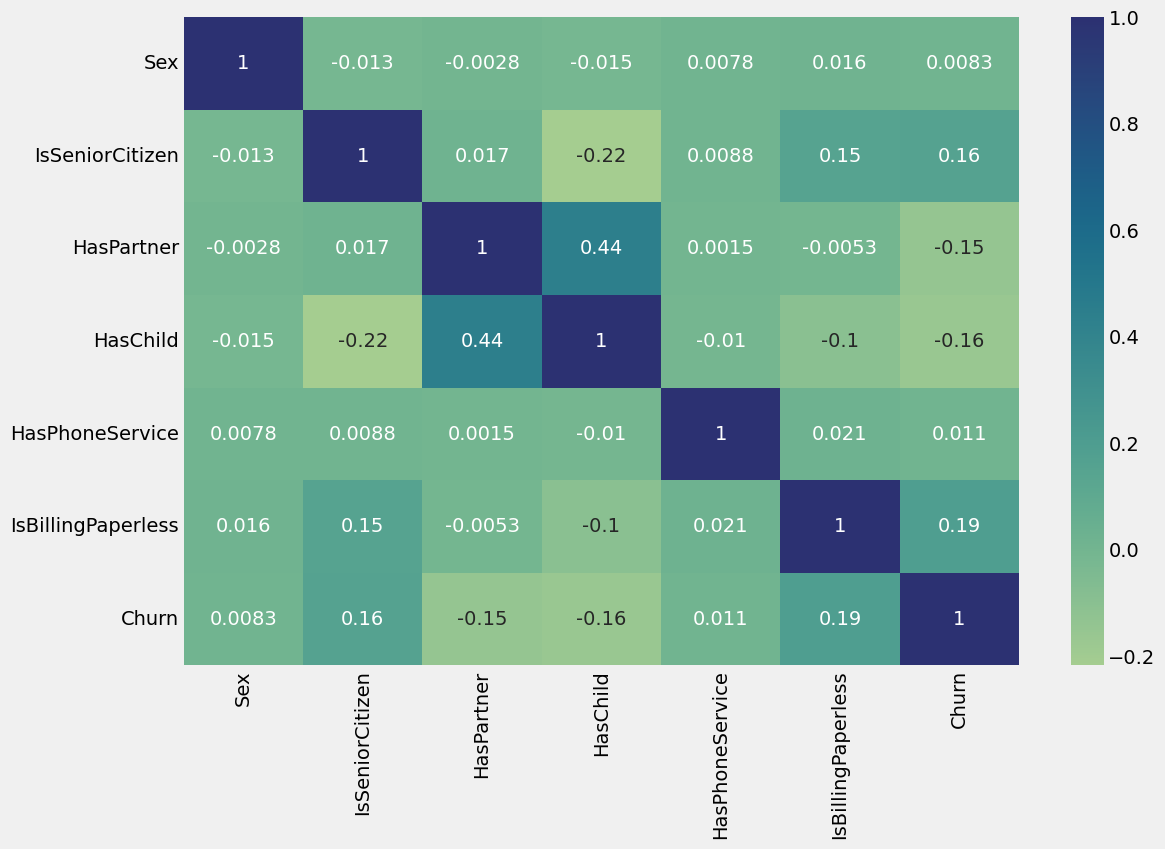

In [18]:
corr = df[binary_cols].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, cmap='crest', annot=True)
plt.show()

Высокая доля оттока наблюдается у:
* Пенсионеров
* Людей без партнера
* Бездетных 
* Клиентов, пользующихся онлайн оплатой (IsBillingPaperless == 'Yes')

Корреляционный анализ подтверждает наличие связи между данными признаками и таргетом.  
Пол клиента и наличие телефонных услуг от компании (HasPhoneService) оказывает слабое влияние на таргет.

In [19]:
drop_cols = num_cols + binary_cols
cat_cols = df.drop(columns=drop_cols).columns.to_list()
cat_cols

['HasMultiplePhoneNumbers',
 'HasInternetService',
 'HasOnlineSecurityService',
 'HasOnlineBackup',
 'HasDeviceProtection',
 'HasTechSupportAccess',
 'HasOnlineTV',
 'HasMovieSubscription',
 'HasContractPhone',
 'PaymentMethod']

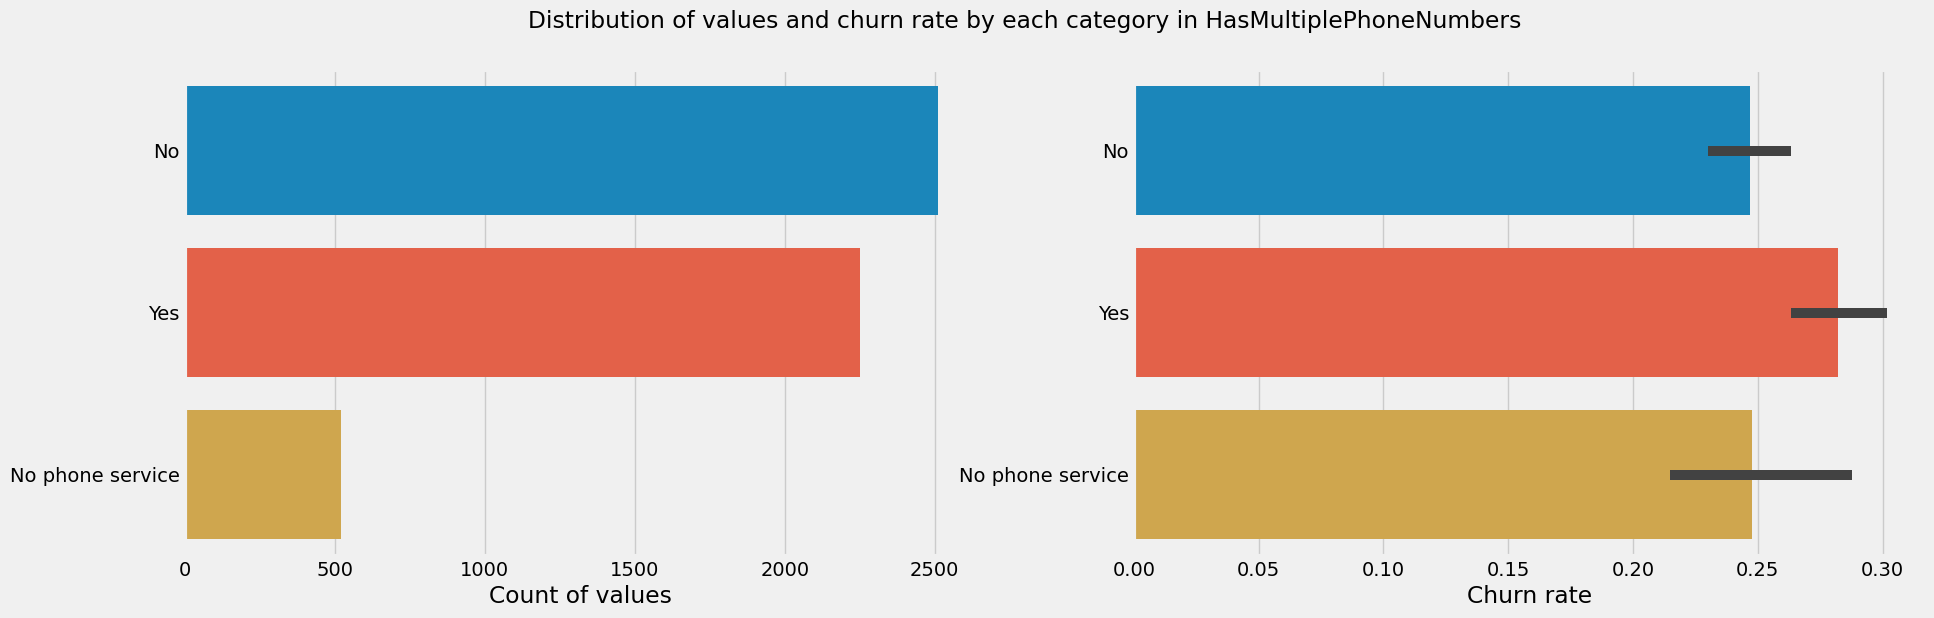

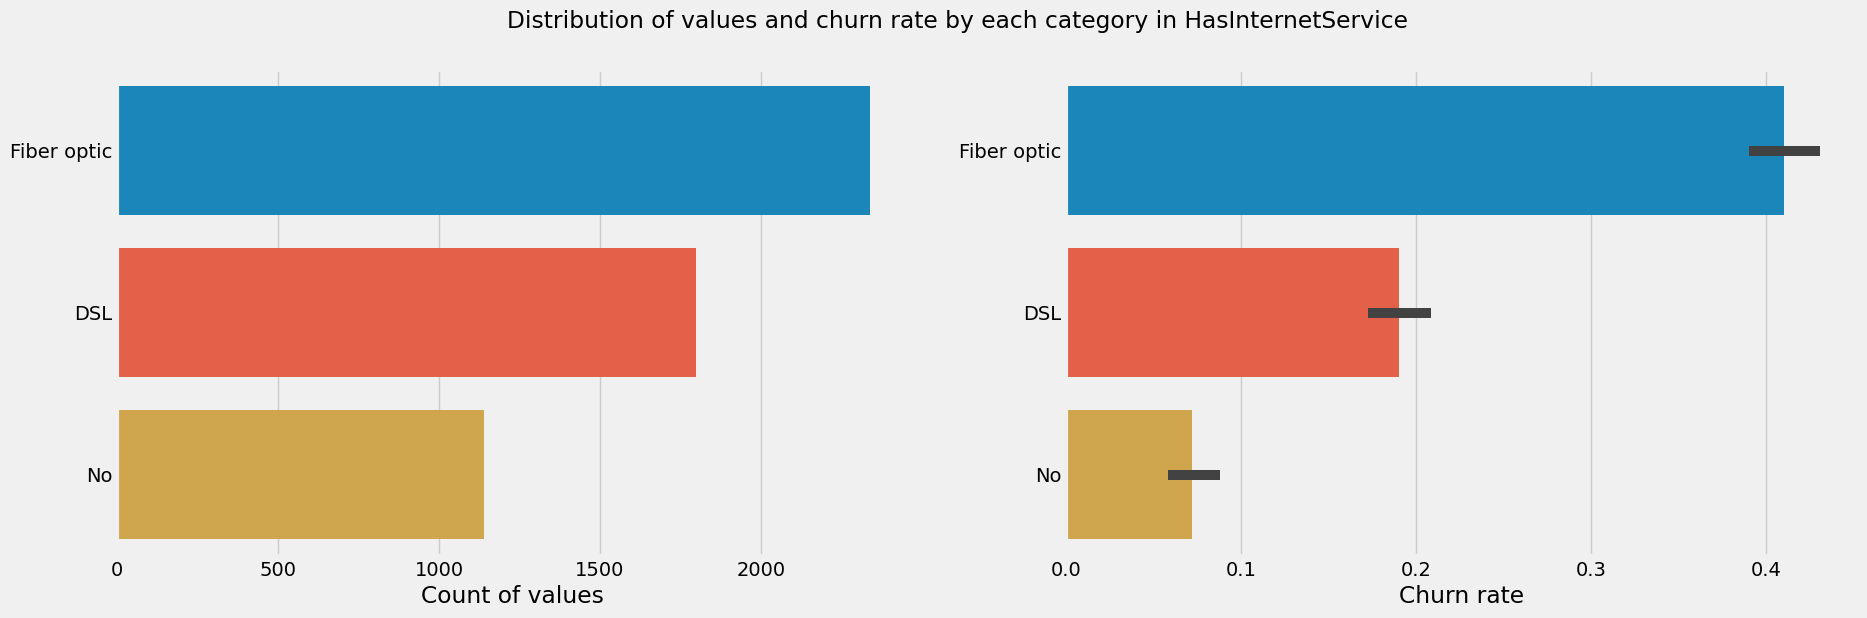

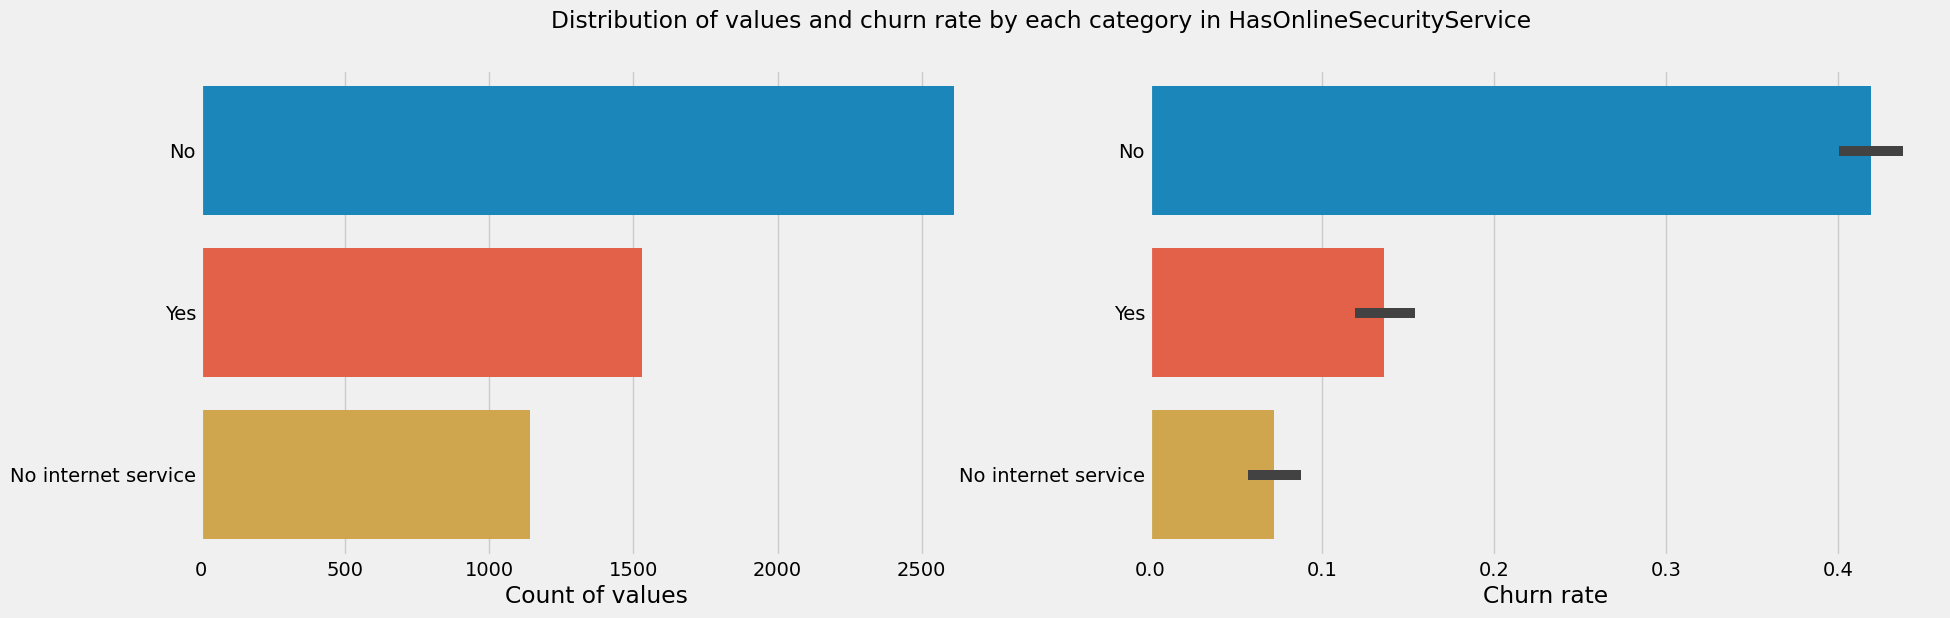

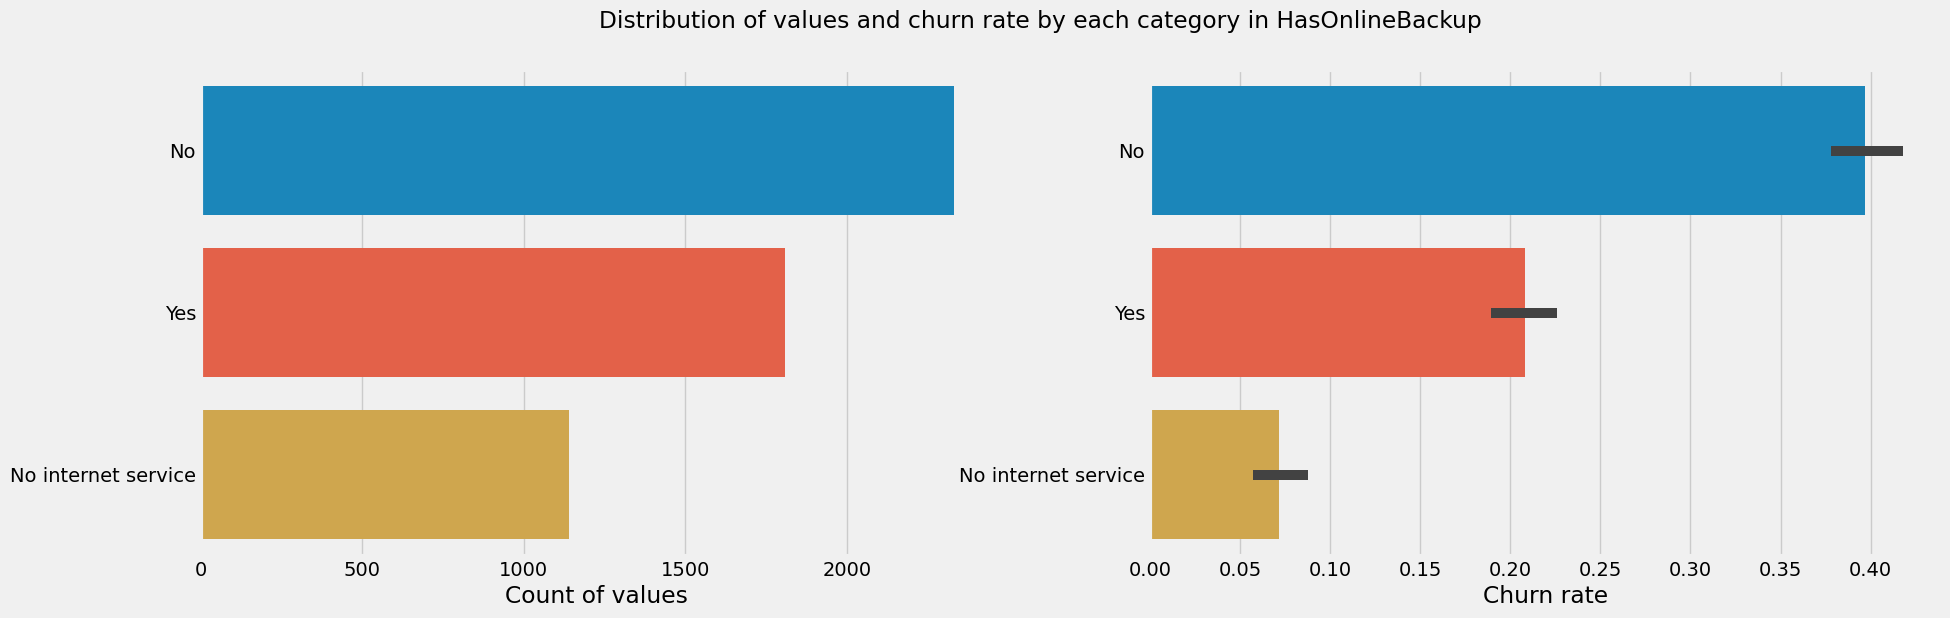

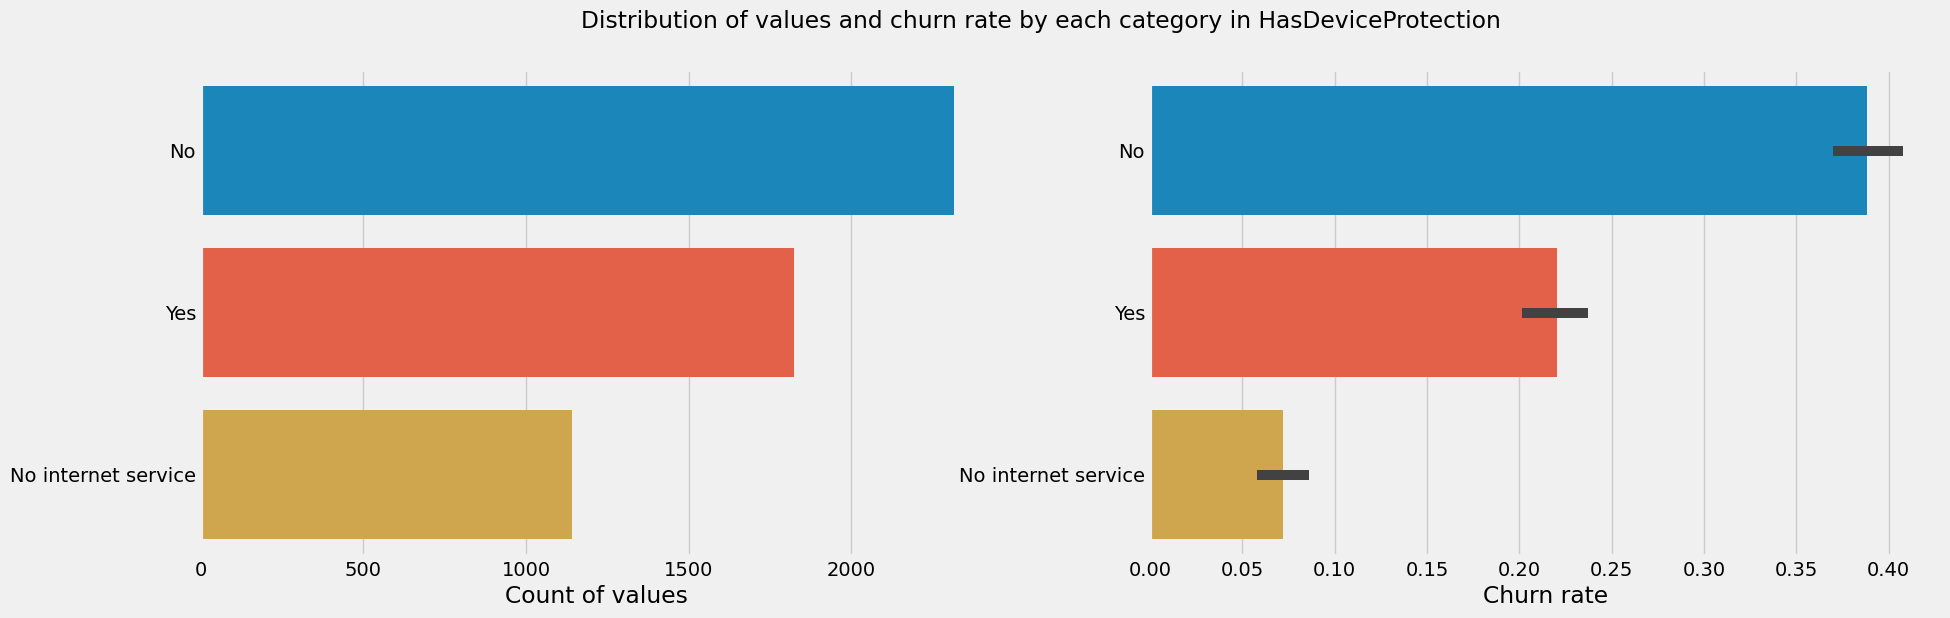

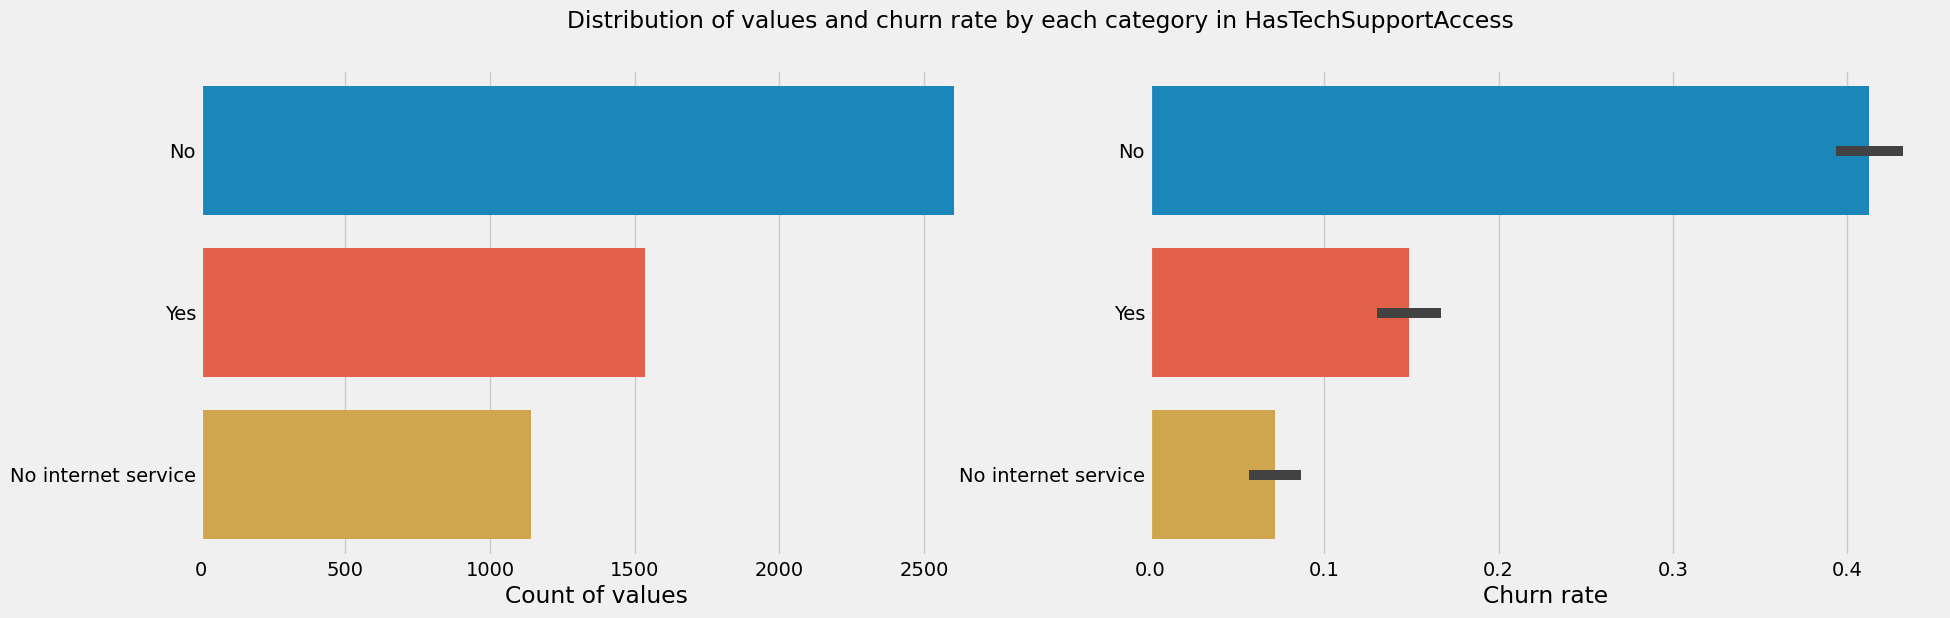

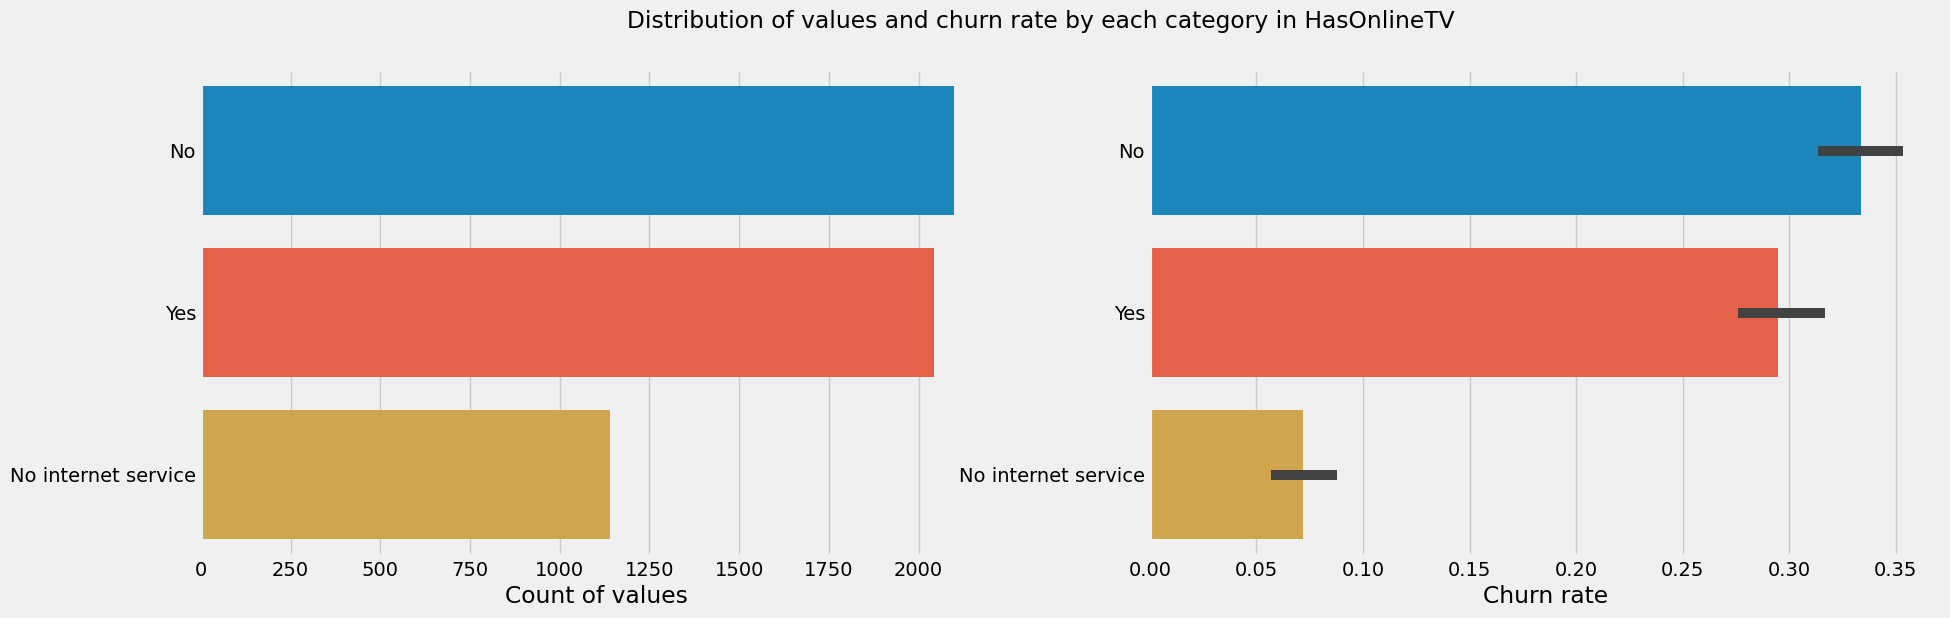

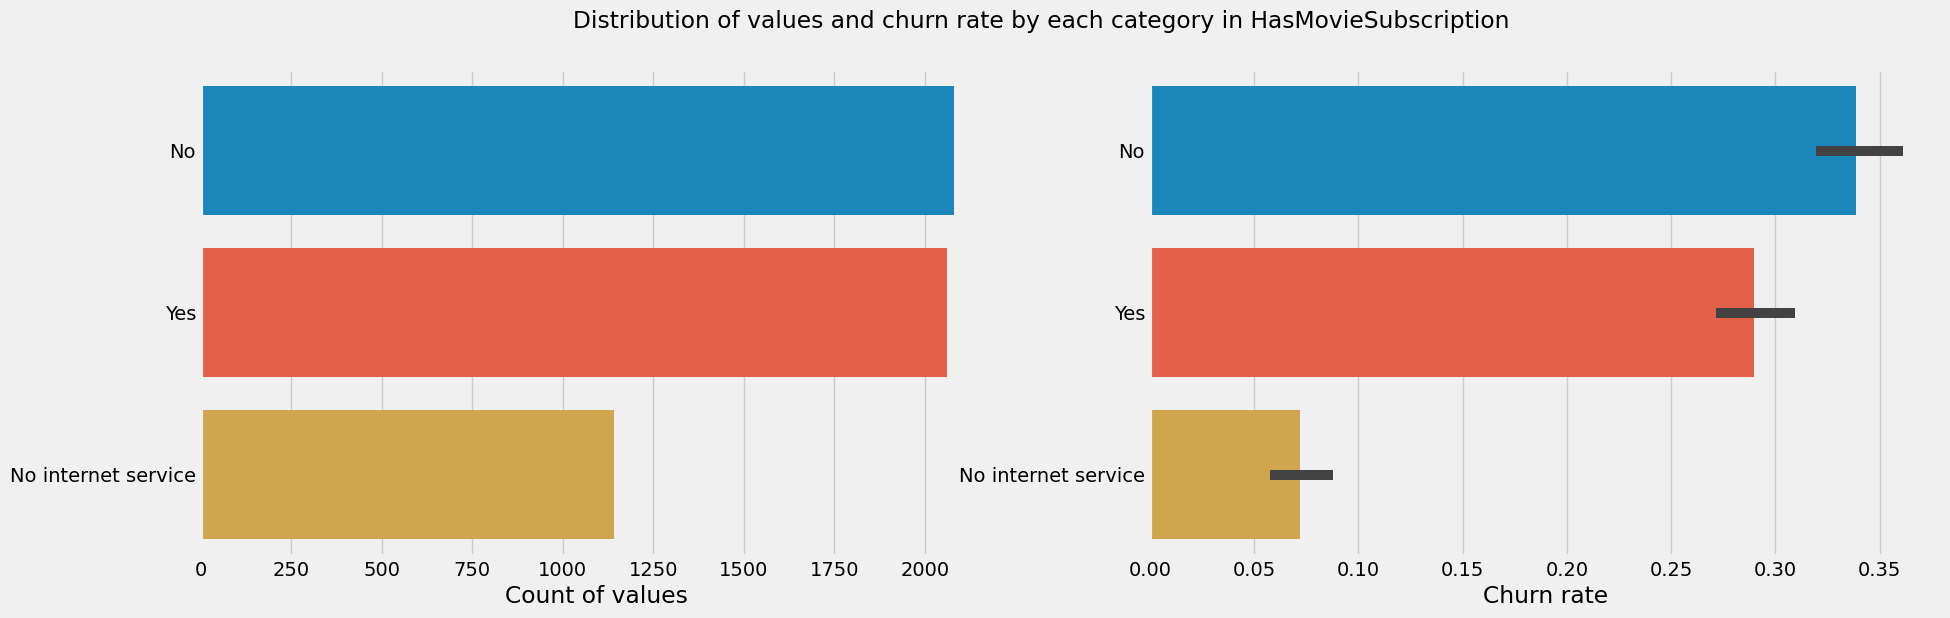

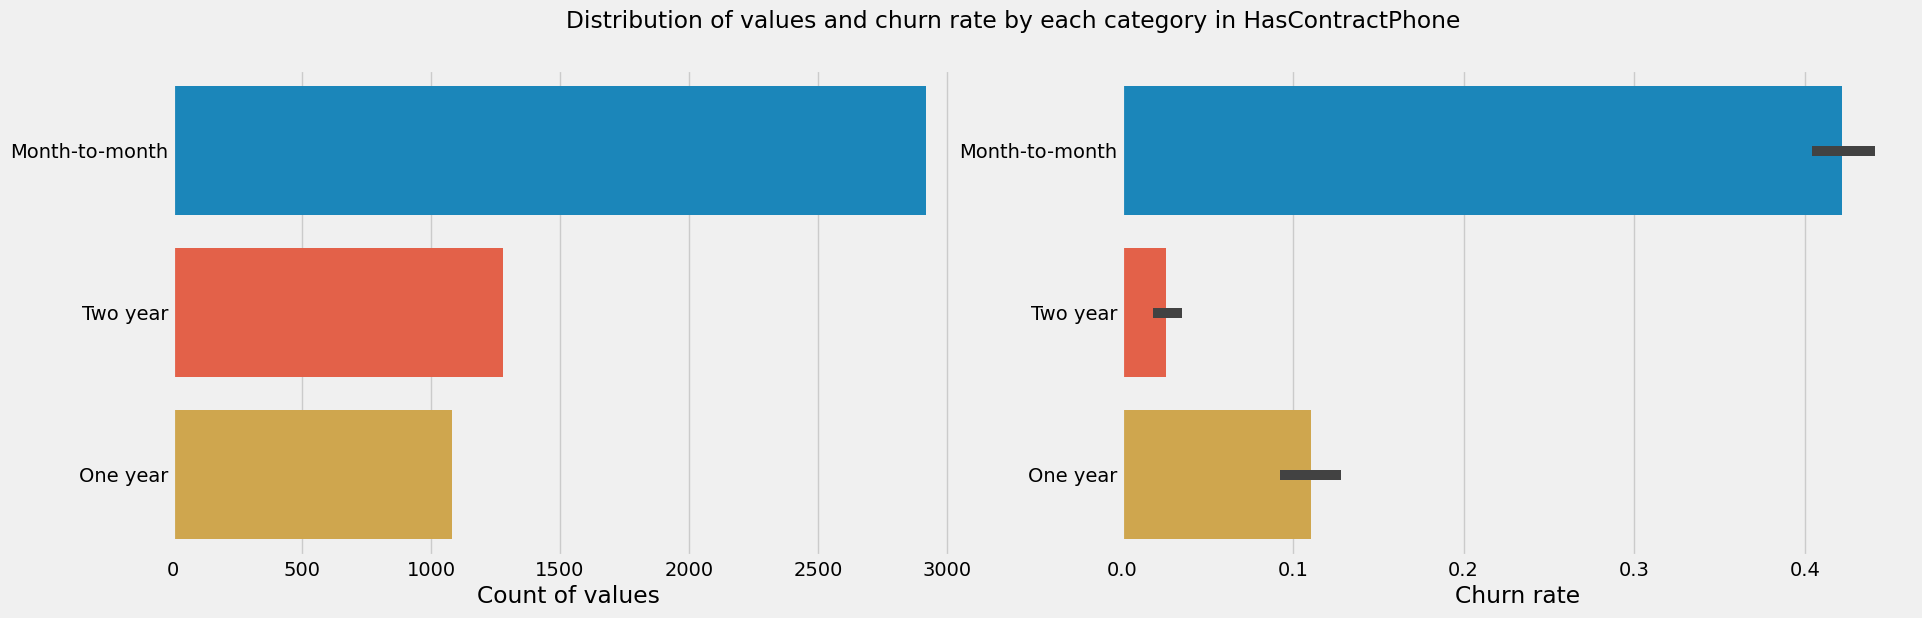

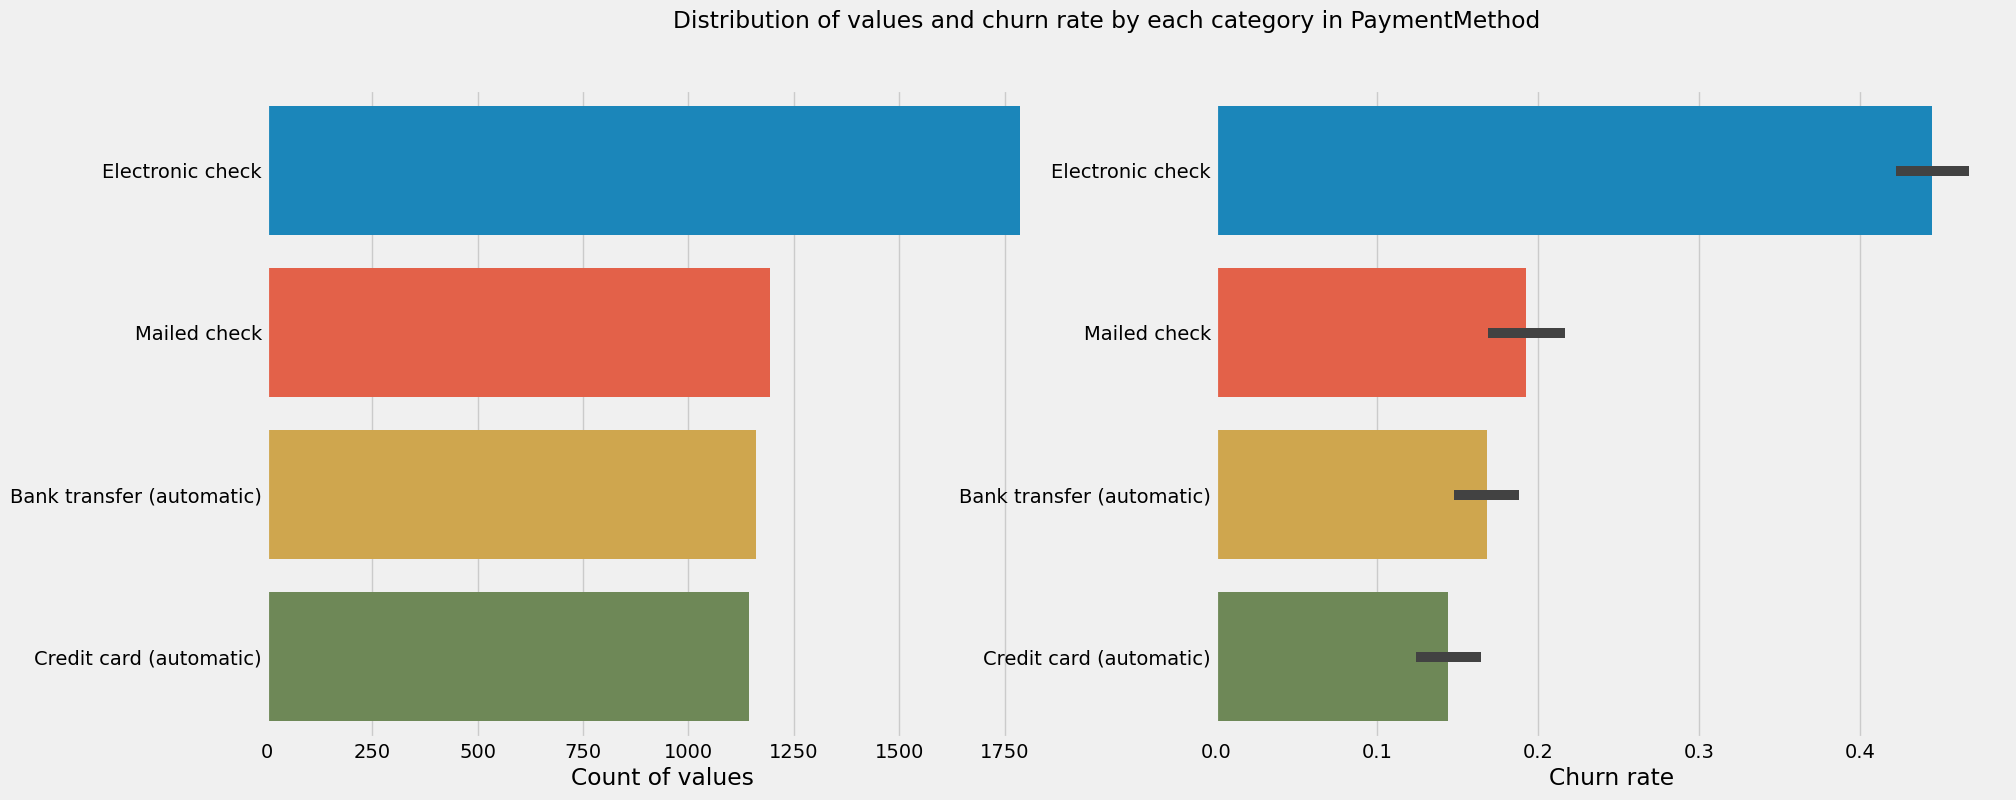

In [20]:
for col in cat_cols:
    pl.cat_plot(col)

Высокая доля оттока наблюдается среди клиентов:
* Пользующихся интернет-услугами;
* Которым проведено оптоволокно (fiber optic);
* Не подключивших дополнительные услуги провайдера (Защита девайсов, онлайн безопасность и т.п.);
* Пользующихся TV-сервисами;
* С ежемесячными выплатами по контракту;
* Оплачивающих счета по электронному чеку;
* Не имеющих доступа к техподдержке.

Далее, с помощью **one-hot encoding** преобразуем имеющиеся категориальные признаки. Во многих столбцах присутствуют значения **no phone service** и **no internet service**, потому такие значение стоит пропускать при one-hot encoding.

In [21]:
def handle_cat_data(data=df):

    dummy_df = pd.DataFrame()

    for col in cat_cols:
        for val in data[col].unique():
            if val in ['No internet service', 'No phone service']:
                continue

            col_name = f'{col}_{val}'         
            dummy_df[col_name] = (data[col] == val).astype(int)
    
    data = pd.concat([data, dummy_df], axis=1)
    data = data.drop(columns=cat_cols)
    data.columns = data.columns.str.replace('-', '_')
    data.columns = data.columns.str.replace(' ', '_')
    
    for col in data.iloc[:, 3:]:
        data[col] = data[col].astype(int)
    
    return data

In [22]:
df = handle_cat_data()
df.head()

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,IsBillingPaperless,Churn,...,HasOnlineTV_Yes,HasMovieSubscription_No,HasMovieSubscription_Yes,HasContractPhone_One_year,HasContractPhone_Two_year,HasContractPhone_Month_to_month,PaymentMethod_Mailed_check,PaymentMethod_Credit_card_(automatic),PaymentMethod_Electronic_check,PaymentMethod_Bank_transfer_(automatic)
0,55.0,19.50,1026.35,0,0,1,1,1,0,0,...,0,0,0,1,0,0,1,0,0,0
1,72.0,25.85,1872.20,0,0,1,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0
2,1.0,75.90,75.90,0,0,0,0,1,1,1,...,0,1,0,0,0,1,0,0,1,0
3,32.0,79.30,2570.00,1,1,1,0,1,0,0,...,0,1,0,0,0,1,1,0,0,0
4,60.0,115.25,6758.45,1,0,1,1,1,0,0,...,1,0,1,0,1,0,0,1,0,0


Далее оценим насколько сильно получившиеся признаки коррелируют с таргетом

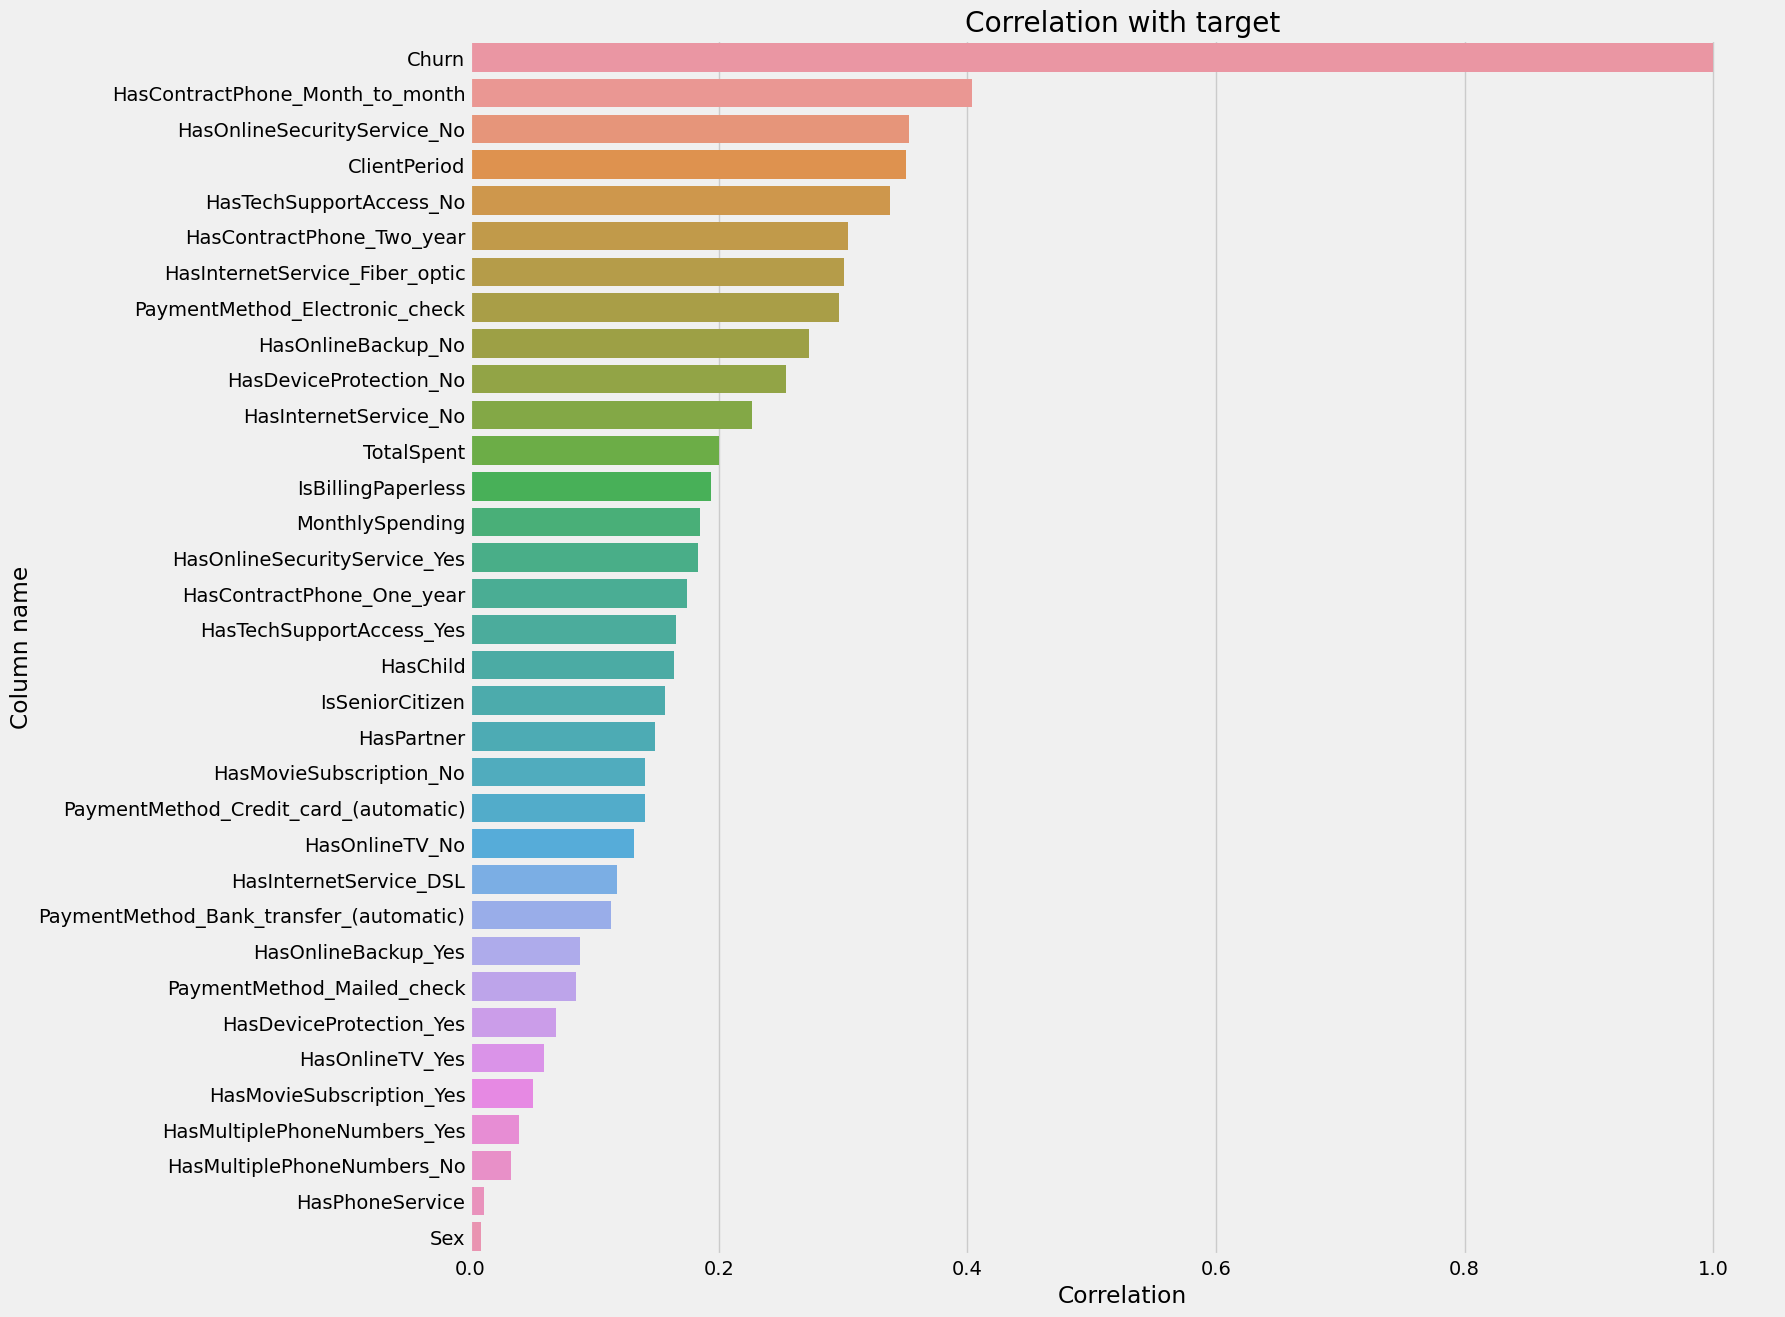

In [23]:
corr = abs(df.corrwith(df['Churn']))
corr = corr.sort_values(ascending=False)

plt.figure(figsize=(15, 15))
sns.barplot(x=corr.values, y=corr.index)
plt.title('Correlation with target')
plt.xlabel('Correlation')
plt.ylabel('Column name')
plt.show()

Допольнительно можно избавиться от мультиколлинеарности, оставляя при этом признаки с наибольшей корреляцией с таргетом.

In [24]:
def delete_multicollinearity(data=df, cut_off=0.75):
    # рассчитываем корреляцию между признаками и таргетом
    corr_target = abs(data.corrwith(df['Churn']))

    # создаем матрицу корреляций и выбираем верхний треугольник матрицы
    corr_matrix = data.corr().abs()
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    
    # отбираем пары признаков, в которых корреляция больше отсечки
    stack = upper[upper > cut_off].stack().index
    
    # из каждой пары выбираем признак с наименьшей корреляцией с таргетом 
    to_drop = []
    
    for pair in stack:
        pair = list(pair)
        to_drop.append(corr[pair].idxmin())
        
    # удаляем признаки
    data = data.drop(columns=to_drop)
    return data

In [25]:
# df = delete_multicollinearity()

# Modeling

## Logistic regression

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.feature_selection import RFECV

In [27]:
sc = StandardScaler()

In [28]:
X = df.drop(columns=['Churn'])
y = df.Churn

Добавим рекурсивный поиск оптимального количества переменных методом RFE из sklearn. Как видно из графика, после 23-х переменных качество модели не улучшается, а значит лишние можно удалить

In [29]:
def rfe_feature_selection(clf=None, X=X, y=y):
    
    rfecv = RFECV(
        estimator=clf,
        step=1,
        cv=5,
        verbose=0,
        scoring='roc_auc'
    )
    
    X = sc.fit_transform(X)
    rfecv.fit(X, y)

    print(f"Optimal number of features : {rfecv.n_features_}")

    f, ax = plt.subplots(figsize=(12, 8))
    plt.xlabel("Number of features selected")
    plt.ylabel("CV-score (ROC-AUC)")
    scores = rfecv.cv_results_['mean_test_score']
    
    plt.plot(range(1, len(scores) + 1), scores)
    plt.show()
    
    return rfecv

Optimal number of features : 23


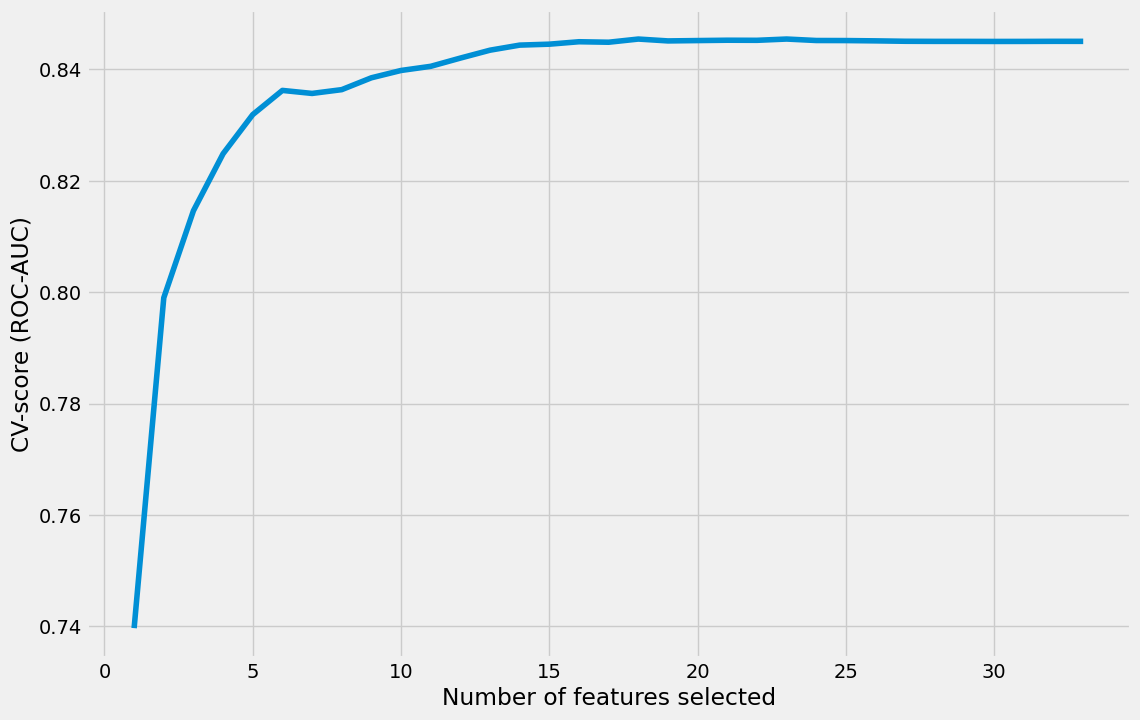

In [30]:
clf_lr = LogisticRegression()
rfe_cv = rfe_feature_selection(clf=clf_lr, X=X, y=y)

In [31]:
support = rfe_cv.get_support()
save_cols = df.drop(columns=['Churn']).loc[:, support].columns.to_list()
save_cols

['ClientPeriod',
 'MonthlySpending',
 'TotalSpent',
 'IsSeniorCitizen',
 'HasChild',
 'IsBillingPaperless',
 'HasMultiplePhoneNumbers_No',
 'HasMultiplePhoneNumbers_Yes',
 'HasInternetService_No',
 'HasInternetService_Fiber_optic',
 'HasInternetService_DSL',
 'HasOnlineSecurityService_No',
 'HasOnlineBackup_No',
 'HasOnlineBackup_Yes',
 'HasDeviceProtection_No',
 'HasDeviceProtection_Yes',
 'HasTechSupportAccess_No',
 'HasOnlineTV_Yes',
 'HasMovieSubscription_Yes',
 'HasContractPhone_Two_year',
 'HasContractPhone_Month_to_month',
 'PaymentMethod_Credit_card_(automatic)',
 'PaymentMethod_Electronic_check']

In [32]:
'''Подбор признаков через поиск по сетке'''

params = {
    'model__C': [1.2289999999999999] # np.arange(0.001, 2, 0.001)
}

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LogisticRegression()),
])

clf_lr = GridSearchCV(
    estimator=pipeline,
    param_grid=params,
    scoring='roc_auc',
    cv=5
)

clf_lr.fit(X, y)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', LogisticRegression())]),
             param_grid={'model__C': [1.2289999999999999]}, scoring='roc_auc')

In [33]:
print(f"best score: {clf_lr.best_score_}")
print(f"best params: {clf_lr.best_params_}")

best score: 0.84506489389287
best params: {'model__C': 1.2289999999999999}


# Random Forest

In [34]:
from sklearn.ensemble import RandomForestClassifier

In [35]:
params = {
    'max_depth': [6], # np.arange(4, 7, 1),
    'n_estimators': [80], # np.arange(50, 110, 10),
    'min_samples_split': [2], # np.arange(2, 25, 1),
    'min_samples_leaf': [22], # np.arange(1, 25, 1)
}

clf_rf = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(clf_rf, params, scoring="roc_auc", cv=5)
rf = grid_search.fit(X, y)

In [36]:
rf.best_params_

{'max_depth': 6,
 'min_samples_leaf': 22,
 'min_samples_split': 2,
 'n_estimators': 80}

In [37]:
rf.best_score_

0.8458978898907847

# XGBoost

In [38]:
import xgboost as xgb

In [39]:
clf_xgb = xgb.XGBClassifier()

params = {
    'learning_rate': [0.04], # np.arange(0.01, 0.21, 0.01),
    'max_depth': [4], # np.arange(4, 10),
    'min_child_weight': [0], # np.arange(0, 5),
    'n_estimators': [80] # np.arange(50, 100, 10)
}

grid_search = GridSearchCV(clf_xgb, params, scoring="roc_auc", cv=5)
clf_xgb = grid_search.fit(X, y)

In [40]:
clf_xgb.best_params_

{'learning_rate': 0.04,
 'max_depth': 4,
 'min_child_weight': 0,
 'n_estimators': 80}

In [41]:
clf_xgb.best_score_

0.8453756189941863

# Catboost

In [42]:
from catboost import CatBoostClassifier

In [43]:
cat_features = df.drop(columns=num_cols+['Churn']).columns.to_list()
cat_features

['Sex',
 'IsSeniorCitizen',
 'HasPartner',
 'HasChild',
 'HasPhoneService',
 'IsBillingPaperless',
 'HasMultiplePhoneNumbers_No',
 'HasMultiplePhoneNumbers_Yes',
 'HasInternetService_No',
 'HasInternetService_Fiber_optic',
 'HasInternetService_DSL',
 'HasOnlineSecurityService_No',
 'HasOnlineSecurityService_Yes',
 'HasOnlineBackup_No',
 'HasOnlineBackup_Yes',
 'HasDeviceProtection_No',
 'HasDeviceProtection_Yes',
 'HasTechSupportAccess_Yes',
 'HasTechSupportAccess_No',
 'HasOnlineTV_No',
 'HasOnlineTV_Yes',
 'HasMovieSubscription_No',
 'HasMovieSubscription_Yes',
 'HasContractPhone_One_year',
 'HasContractPhone_Two_year',
 'HasContractPhone_Month_to_month',
 'PaymentMethod_Mailed_check',
 'PaymentMethod_Credit_card_(automatic)',
 'PaymentMethod_Electronic_check',
 'PaymentMethod_Bank_transfer_(automatic)']

In [44]:
clf_cat = CatBoostClassifier(
    random_state=42,
    logging_level="Silent",
    eval_metric='AUC:hints=skip_train~false',
    cat_features=cat_features
)

In [45]:
params = {
    'learning_rate': [0.17], # np.arange(0.1, 0.5, 0.01),
    'depth': [4], # np.arange(4, 11, 1),
    'n_estimators': [50], # np.arange(40, 300, 10),
    'l2_leaf_reg': [1.6], # np.arange(0.9, 2, 0.01)
    
}

clf_cat.grid_search(
    param_grid=params,
    X=X, y=y,
    cv=5,
    verbose=False,
    plot=True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

{'params': {'depth': 4,
  'iterations': 50,
  'learning_rate': 0.17,
  'l2_leaf_reg': 1.6},
 'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,
               4

In [46]:
clf_cat.get_best_score()

{'learn': {'Logloss': 0.38590550013319086, 'AUC': 0.8680514981745493}}

In [47]:
clf_cat.get_params()

{'logging_level': 'Silent',
 'eval_metric': 'AUC:hints=skip_train~false',
 'random_state': 42,
 'cat_features': ['Sex',
  'IsSeniorCitizen',
  'HasPartner',
  'HasChild',
  'HasPhoneService',
  'IsBillingPaperless',
  'HasMultiplePhoneNumbers_No',
  'HasMultiplePhoneNumbers_Yes',
  'HasInternetService_No',
  'HasInternetService_Fiber_optic',
  'HasInternetService_DSL',
  'HasOnlineSecurityService_No',
  'HasOnlineSecurityService_Yes',
  'HasOnlineBackup_No',
  'HasOnlineBackup_Yes',
  'HasDeviceProtection_No',
  'HasDeviceProtection_Yes',
  'HasTechSupportAccess_Yes',
  'HasTechSupportAccess_No',
  'HasOnlineTV_No',
  'HasOnlineTV_Yes',
  'HasMovieSubscription_No',
  'HasMovieSubscription_Yes',
  'HasContractPhone_One_year',
  'HasContractPhone_Two_year',
  'HasContractPhone_Month_to_month',
  'PaymentMethod_Mailed_check',
  'PaymentMethod_Credit_card_(automatic)',
  'PaymentMethod_Electronic_check',
  'PaymentMethod_Bank_transfer_(automatic)'],
 'depth': 4,
 'iterations': 50,
 'learni

In [48]:
test_df = pd.read_csv('data/test.csv')
X_test = handle_num_data(test_df)
X_test = handle_binary_data(test_df)
X_test = handle_cat_data(test_df)

X_test.columns = X_test.columns.str.replace('-', '_')
X_test.columns = X_test.columns.str.replace(' ', '_')
pred = clf_cat.predict_proba(X_test)

In [49]:
submission = pd.read_csv('data/submission.csv')
submission['Churn'] = pred[:, 1]
submission.to_csv('catboost_predictions.csv', index=False)

# Stacking

In [50]:
from sklearn.ensemble import StackingClassifier

In [51]:
final_clf = CatBoostClassifier(
    random_state=42,
    logging_level="Silent",
    eval_metric='AUC:hints=skip_train~false',
)

stacking = StackingClassifier(
    estimators=[
        ('logreg', clf_lr),
        ('rf', clf_lr),
        ('xgb', clf_xgb),
        ('catboost', clf_cat),
    ],
    final_estimator=final_clf,
    n_jobs=-1,
)

params = {
    'passthrough': [True],
    'final_estimator__learning_rate': [0.03], #np.arange(0.01, 0.21, 0.01),
    'final_estimator__depth': [4], # np.arange(4, 10, 1),
    'final_estimator__n_estimators': [50], # np.arange(40, 300, 10),
    'final_estimator__l2_leaf_reg': [0.9] # np.arange(0.9, 2, 0.1)
}

grid_search = GridSearchCV(stacking, params, scoring="roc_auc", cv=5)
clf_stack = grid_search.fit(X, y)

In [52]:
clf_stack.best_score_

0.8490790543780484

In [53]:
clf_stack.best_params_

{'final_estimator__depth': 4,
 'final_estimator__l2_leaf_reg': 0.9,
 'final_estimator__learning_rate': 0.03,
 'final_estimator__n_estimators': 50,
 'passthrough': True}

In [54]:
test_df = pd.read_csv('data/test.csv')
X_test = handle_num_data(test_df)
X_test = handle_binary_data(test_df)
X_test = handle_cat_data(test_df)
X_test = X_test.reindex(X.columns, axis=1)

pred = clf_stack.predict_proba(X_test)

submission = pd.read_csv('data/submission.csv')
submission['Churn'] = pred[:, 1]
submission.to_csv('stacking_predictions.csv', index=False)

# Best model - Catboost 